## Practice

Author: Ayana Andrews-Joseph

### Import Packages

In [2]:
# data processing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# random number generator
import random


### 1.a - Load Data

In [3]:
# read dataset as a pandas df
heart = pd.read_csv(r'.../heart.csv')

# target variable (column name)
target = 'HeartDisease'

sns.set(style='darkgrid')

In [4]:
heart.shape

(918, 12)

In [5]:
# Looksee
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Quick Look and summary

In [7]:
# check averages and other descriptive stats
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


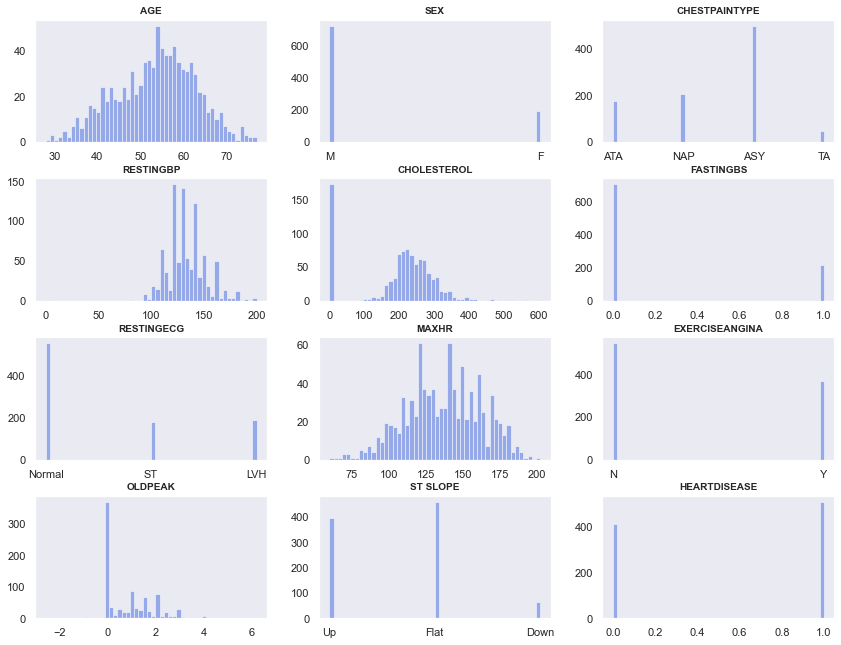

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    col = heart.columns[i]
    heart[col].hist(bins=50, ax=ax, grid=False, color='royalblue', alpha=.5)
    ax.set_title(col.upper().replace('_', ' '), weight='bold', size=10);

### 1.b - Random TRAIN/TEST Data Sets

In [9]:
# length of 80% of data rows
heart.shape[0]*.8

734.4000000000001

### Create two random partitions: train and test

In [26]:
train, test = train_test_split(
    heart, test_size=0.20, random_state=39) #39 seed is for reproducible output across multiple function calls

print(len(train), len(test))

734 184


### 2.a - ID Non-numeric Columns

In [19]:
# View of raw non-numeric data
heart.select_dtypes(exclude=['number'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


Non-Numeric Columns

In [20]:
charvar = heart.select_dtypes(exclude=['number']).columns

In [22]:
print(f'{charvar} are non-nueric columns.')

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object') are non-nueric columns.


### 2.b - Create Binary Flags

In [29]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

NTS: No columns listed defaults to all objects and category data w/binary flags

In [30]:
# validate
train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
473,60,141,316,1,122,1.7,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
339,64,95,0,1,145,1.1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
583,69,142,271,0,126,0.3,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
773,56,120,193,0,162,1.9,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


### 3 - Calculate z-scores (Standardize)
NTS: The entire data set (including dummies) is standardized.

Address target

In [49]:
X_train = train.drop(target, axis=1)
X_test = test.drop(target, axis=1)

y_train = train[target]
y_test = test[target]

In [51]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
473,60,141,316,1,122,1.7,0,1,0,0,1,0,0,0,1,0,1,0,1,0
339,64,95,0,1,145,1.1,1,0,1,0,0,0,0,1,0,1,0,1,0,0
583,69,142,271,0,126,0.3,0,1,0,0,1,0,1,0,0,1,0,0,0,1
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
773,56,120,193,0,162,1.9,0,1,0,0,0,1,1,0,0,1,0,0,1,0


In [52]:
X_train_z = X_train.select_dtypes(include='number').apply(stats.zscore)
X_test_z = X_test.select_dtypes(include='number').apply(stats.zscore)
train_z.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
473,0.701102,0.480242,1.070214,1.894070,-0.577331,0.778028,0.903787,-0.523742,0.523742,-1.073542,...,1.871648,-0.223767,-0.519515,-1.230325,2.096917,-1.202775,1.202775,-0.270369,1.0,-0.871890
339,1.126839,-1.979170,-1.848693,1.894070,0.307990,0.213820,0.903787,1.909337,-1.909337,0.931496,...,-0.534288,-0.223767,-0.519515,0.812794,-0.476891,0.831411,-0.831411,3.698648,-1.0,-0.871890
583,1.659009,0.533708,0.654547,-0.527964,-0.423362,-0.538458,-1.106455,-0.523742,0.523742,-1.073542,...,1.871648,-0.223767,1.924871,-1.230325,-0.476891,0.831411,-0.831411,-0.270369,-1.0,1.146934
915,0.381800,-0.107878,-0.638640,-0.527964,-0.846777,0.307855,0.903787,-0.523742,0.523742,0.931496,...,-0.534288,-0.223767,-0.519515,0.812794,-0.476891,-1.202775,1.202775,-0.270369,1.0,-0.871890
773,0.275366,-0.642533,-0.065943,-0.527964,0.962358,0.966098,-1.106455,-0.523742,0.523742,-1.073542,...,-0.534288,4.468940,1.924871,-1.230325,-0.476891,0.831411,-0.831411,-0.270369,1.0,-0.871890


In [48]:
# Check correlations
X_train_z.corr()['Sex_F']

Age                 -0.039946
RestingBP            0.005884
Cholesterol          0.198965
FastingBS           -0.107916
MaxHR                0.188230
Oldpeak             -0.125847
Sex_F                1.000000
Sex_M               -1.000000
ChestPainType_ASY   -0.183417
ChestPainType_ATA    0.160843
ChestPainType_NAP    0.071082
ChestPainType_TA    -0.008308
RestingECG_LVH       0.060119
RestingECG_Normal    0.012567
RestingECG_ST       -0.079133
ExerciseAngina_N     0.192698
ExerciseAngina_Y    -0.192698
ST_Slope_Down       -0.075821
ST_Slope_Flat       -0.092815
ST_Slope_Up          0.132254
Name: Sex_F, dtype: float64

Think this is a good sign, checked correlationsSex_F and that was 1.0 for that row. Note, Sex_M is exact opposite (good). 

# **4**

## 4.a - Logistic Regression 
- Model using `HeartDisease` as target var

#### Model Building

In [57]:
#create joined df of standardized data and target
df_trn = pd.concat([X_train_z, y_train], axis=1, join='inner')
df_tst = pd.concat([X_test_z, y_test], axis=1, join='inner')
df_trn

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
473,0.701102,0.480242,1.070214,1.894070,-0.577331,0.778028,-0.523742,0.523742,-1.073542,-0.491897,...,-0.223767,-0.519515,-1.230325,2.096917,-1.202775,1.202775,-0.270369,1.0,-0.871890,1
339,1.126839,-1.979170,-1.848693,1.894070,0.307990,0.213820,1.909337,-1.909337,0.931496,-0.491897,...,-0.223767,-0.519515,0.812794,-0.476891,0.831411,-0.831411,3.698648,-1.0,-0.871890,1
583,1.659009,0.533708,0.654547,-0.527964,-0.423362,-0.538458,-0.523742,0.523742,-1.073542,-0.491897,...,-0.223767,1.924871,-1.230325,-0.476891,0.831411,-0.831411,-0.270369,-1.0,1.146934,0
915,0.381800,-0.107878,-0.638640,-0.527964,-0.846777,0.307855,-0.523742,0.523742,0.931496,-0.491897,...,-0.223767,-0.519515,0.812794,-0.476891,-1.202775,1.202775,-0.270369,1.0,-0.871890,1
773,0.275366,-0.642533,-0.065943,-0.527964,0.962358,0.966098,-0.523742,0.523742,-1.073542,-0.491897,...,4.468940,1.924871,-1.230325,-0.476891,0.831411,-0.831411,-0.270369,1.0,-0.871890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.659009,-0.535602,0.146509,1.894070,-2.040036,-0.820562,-0.523742,0.523742,0.931496,-0.491897,...,-0.223767,1.924871,-1.230325,-0.476891,-1.202775,1.202775,-0.270369,1.0,-0.871890,1
64,-0.363239,-1.177188,0.017190,-0.527964,0.307990,-0.820562,1.909337,-1.909337,-1.073542,2.032945,...,-0.223767,-0.519515,0.812794,-0.476891,0.831411,-0.831411,-0.270369,-1.0,1.146934,0
41,0.062497,-0.107878,0.866999,-0.527964,-1.424160,-0.820562,1.909337,-1.909337,-1.073542,-0.491897,...,-0.223767,-0.519515,-1.230325,2.096917,-1.202775,1.202775,-0.270369,1.0,-0.871890,1
105,0.381800,0.426777,0.552939,1.894070,0.115529,-0.820562,-0.523742,0.523742,-1.073542,2.032945,...,-0.223767,-0.519515,0.812794,-0.476891,0.831411,-0.831411,-0.270369,-1.0,1.146934,0


734 rows in the training set with `actual` events coded

In [96]:
# set up predictors and target (X, y)

preds = df_trn.columns[1:-1]

X_trnS = df_trn[preds]
y_trnS = df_trn['HeartDisease']

X_tstS = df_tst[preds]
y_tstS = df_tst['HeartDisease']

Data Check on X, y

In [97]:
X_trnS.head(3)

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
473,0.480242,1.070214,1.894070,-0.577331,0.778028,-0.523742,0.523742,-1.073542,-0.491897,1.871648,-0.223767,-0.519515,-1.230325,2.096917,-1.202775,1.202775,-0.270369,1.0,-0.871890
339,-1.979170,-1.848693,1.894070,0.307990,0.213820,1.909337,-1.909337,0.931496,-0.491897,-0.534288,-0.223767,-0.519515,0.812794,-0.476891,0.831411,-0.831411,3.698648,-1.0,-0.871890
583,0.533708,0.654547,-0.527964,-0.423362,-0.538458,-0.523742,0.523742,-1.073542,-0.491897,1.871648,-0.223767,1.924871,-1.230325,-0.476891,0.831411,-0.831411,-0.270369,-1.0,1.146934


In [98]:
y_tstS.head(3)

864    1
901    1
480    1
Name: HeartDisease, dtype: int64

### Target distributions in the training and test partitions

In [99]:
# train % dist.
y_trnS.value_counts() / len(y_trnS)

1    0.550409
0    0.449591
Name: HeartDisease, dtype: float64

In [100]:
# test % dist.
y_tstS.value_counts() / len(y_tstS)

1    0.565217
0    0.434783
Name: HeartDisease, dtype: float64

**Distributions look good for both partitions.**

In [101]:
from sklearn.linear_model import LogisticRegression

# define the model object ('liblinear' is recommended for small datasets)
clf = LogisticRegression(solver='liblinear', random_state=314)

# train (fit) the model using the training sample
clf.fit(X_trnS, y_trnS)

# make predictions on the test sample
y_trn_preds = clf.predict(X_tstS)

### Model Accuracy

In [102]:
from sklearn.metrics import accuracy_score

accuracy_score(y_tstS, y_trn_preds)

0.8478260869565217

Not too shabby.

In [103]:
# check model's predictions against actual value of the target event

pd.crosstab(y_tstS, y_trn_preds, margins=True)

col_0,0,1,All
HeartDisease,,,
0,64,16,80
1,12,92,104
All,76,108,184


Matches, 184 rows in test set.

### 4.b - Decision (Classification Tree)

#### Max Depth

In [104]:
# create a list of all values we would like to test
max_depths = np.linspace(1, 20, 20)
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [320]:
# create empty arrays -- the higher the auc, the better the model
auc_train, auc_test = [], []

for depth in max_depths:
    
    # define the model
    tree = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=314)
    
    # fit the model
    tree.fit(X_trnS, y_trnS)
    
    # get model scores
    scores_train = tree.predict_proba(X_trnS)[:, 1]
    scores_test = tree.predict_proba(X_tstS)[:, 1] 
    
    _auc_train = roc_auc_score(y_trnS, scores_train)
    _auc_test = roc_auc_score(y_tstS, scores_test)

    # save the AUC values
    auc_train.append(_auc_train)
    auc_test.append(_auc_test)


In [228]:
# Look at first 5 auc's (areas unther the curve)
auc_train

[0.8096309630963096,
 0.8793579357935795,
 0.9141314131413142,
 0.9352835283528352,
 0.9556893189318931,
 0.9739911491149116,
 0.9845109510951096,
 0.990954095409541,
 0.995979597959796,
 0.9988861386138614,
 0.9997937293729373,
 0.9999362436243625,
 0.999992499249925,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

# Optimization - Decision (Classification) Tree

`Optimization Technique - Grid Search` - avoid fine-tuning one hyper-parameter at a time.

In [380]:
tree = DecisionTreeClassifier(random_state=314)

# create a list of all parameters we want to test
param_grid = {'max_depth': [4, 5, 6, 7, 8, 9, 'depth'], 
              'min_samples_leaf': [0.05, 0.03, 0.02], 
              'min_samples_split': [0.05, 0.03, 0.02], 
              'criterion': ['gini', 'entropy']}

# define the gridsearch object
tree_gs = GridSearchCV(tree, param_grid, cv=3, verbose=2, n_jobs=-1)

# fit the model
tree_gs.fit(X_train, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80251478 0.80251478 0.80251478 0.80929519 0.80929519 0.80929519
 0.81344931 0.81208877 0.81208877 0.80251478 0.80251478 0.80251478
 0.80656853 0.80656853 0.80656853 0.80936211 0.81072265 0.81072265
 0.80251478 0.80251478 0.80251478 0.80656853 0.80656853 0.80656853
 0.80936211 0.81072265 0.81072265 0.80251478 0.80251478 0.80251478
 0.80656853 0.80656853 0.80656853 0.80936211 0.81072265 0.81072265
 0.80251478 0.80251478 0.80251478 0.80656853 0.80656853 0.80656853
 0.80936211 0.81072265 0.81072265 0.80251478 0.80251478 0.80251478
 0.80656853 0.80656853 0.80656853 0.80936211 0.81072265 0.81072265
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.81612022 0.81612022 0.81612022
 0.82426118 0.82426118 0.82426118 0.83249693 0.83249693 0.83249693
 0.81612022 0.81612022 0.81612022 0.82426118 0.82426

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 'depth'],
                         'min_samples_leaf': [0.05, 0.03, 0.02],
                         'min_samples_split': [0.05, 0.03, 0.02]},
             verbose=2)

In [381]:
tree_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 0.02,
 'min_samples_split': 0.05}

In [389]:
# create empty arrays -- the higher the auc, the better the model
auc_train, auc_test = [], []

for depth in max_depths:
    
    # define the model
    tree = DecisionTreeClassifier(criterion= 'entropy',
                                  max_depth = depth,
                                  min_samples_split = 0.05,
                                  random_state = 314)
    
    # fit the model
    tree.fit(X_trnS, y_trnS)
    
    # get model scores
    scores_train = tree.predict_proba(X_trnS)[:, 1]
    scores_test = tree.predict_proba(X_tstS)[:, 1] 
    
    _auc_train = roc_auc_score(y_trnS, scores_train)
    _auc_test = roc_auc_score(y_tstS, scores_test)

    # save the AUC values
    auc_train.append(_auc_train)
    auc_test.append(_auc_test)

In [390]:
# Look at first 5 auc's (areas unther the curve)
auc_train[:5]

[0.8096309630963096,
 0.8793579357935795,
 0.9161491149114911,
 0.9352572757275728,
 0.9477535253525352]

Find out where AUC on the test set maximizes.

In [391]:
best_loc = [i for i, v in enumerate(auc_test) \
    if v == max(auc_test)]

best_loc

[3]

In [392]:
best_auc = auc_test[best_loc[0]]

best_auc

0.9035456730769231

In [393]:
best_max_depth = int(best_loc[0]) + 1
best_max_depth

4

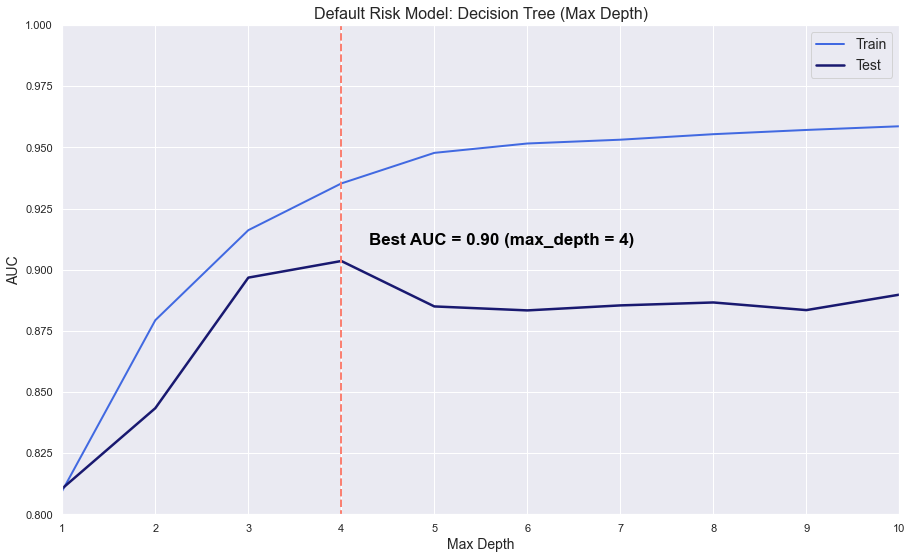

In [394]:
plt.figure(figsize=(15, 9))

plt.plot(max_depths, auc_train, color='royalblue', lw=2, label='Train')
plt.plot(max_depths, auc_test, color='midnightblue', lw=2.5, label='Test')

plt.plot([4, 4], [0, 1], color='salmon', linewidth=2, linestyle='--')
plt.text(5.5 - 1.2, .91, f'Best AUC = {best_auc:.2f} (max_depth = {best_max_depth})', fontsize=17,
         color='black', weight='semibold')

plt.xticks(max_depths)
plt.ylim([0.8, 1.0])
plt.xlim([1, 10])

plt.xlabel('Max Depth', fontsize = 14)
plt.ylabel('AUC', fontsize = 14)
plt.title('Default Risk Model: Decision Tree (Max Depth)', fontsize = 16)
plt.legend(loc='best', fontsize = 14);

AFter using Grid search for hyper-parameters optimization, a couple were modified as the output did not support the optimization (suggested `max_depth` = 4, or any int was not helpful and removed the `min_samples_leaf` = 0.02 was not helpful).

### 4.c - Random Forest

`Perform Random Search`

In [440]:
forest = RandomForestClassifier(random_state=314)

param_grid = {'n_estimators': [100, 200, 300, 550, 700],  
              'max_depth': [3, 6, 7, 10, 'depth'],
              'min_samples_leaf': [0.02, 0.05],
              'bootstrap': [True, False], 
              'max_features':['auto', 'n_features'], 
              'criterion': ['gini', 'entropy']}

forest_gs = RandomizedSearchCV(forest, param_grid, cv=3, verbose=2, n_iter=10,
                               n_jobs=-1, random_state=314)


forest_gs.fit(X_trnS, y_trnS)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.85698115        nan 0.86106836 0.87467938 0.86379503        nan
        nan 0.86107394        nan        nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=314),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 7, 10, 'depth'],
                                        'max_features': ['auto', 'n_features'],
                                        'min_samples_leaf': [0.02, 0.05],
                                        'n_estimators': [100, 200, 300, 550,
                                                         700]},
                   random_state=314, verbose=2)

In [441]:
forest_gs.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 0.02,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini',
 'bootstrap': True}

**`Default Risk Model (Random Forest)`**

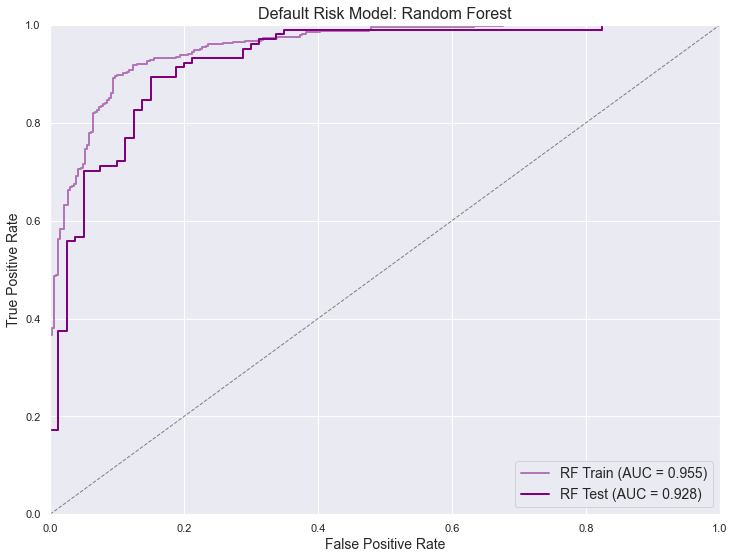

In [423]:
forest_scores_train = forest_gs.predict_proba(X_trnS)[:, 1]
forest_scores_test = forest_gs.predict_proba(X_tstS)[:, 1]

forest_fpr_train, forest_tpr_train, _ = roc_curve(y_trnS, forest_scores_train)
forest_fpr_test, forest_tpr_test, _ = roc_curve(y_tstS, forest_scores_test)

plt.figure(figsize=(12, 9))

plt.plot(forest_fpr_train, forest_tpr_train, color='purple', lw=2, alpha = 0.5, linestyle = '-',
         label=f'RF Train (AUC = {roc_auc_score(y_train, forest_scores_train):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'RF Test (AUC = {roc_auc_score(y_test, forest_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Default Risk Model: Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

**`OPTIMIZED Risk Model (Random Forest)`**

In [443]:
# define the model using suggested hyperpparameters
forest_gs = RandomForestClassifier(random_state = 314,
                                   n_estimators = 300, 
                                   min_samples_leaf = 0.02, 
                                   max_depth = 3, 
                                   bootstrap = True, 
                                   max_features='auto',
                                   criterion = 'gini')

# fit the model
forest_gs.fit(X_trnS, y_trnS)
    
# predict 
forest_gs.predict(X_tstS)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

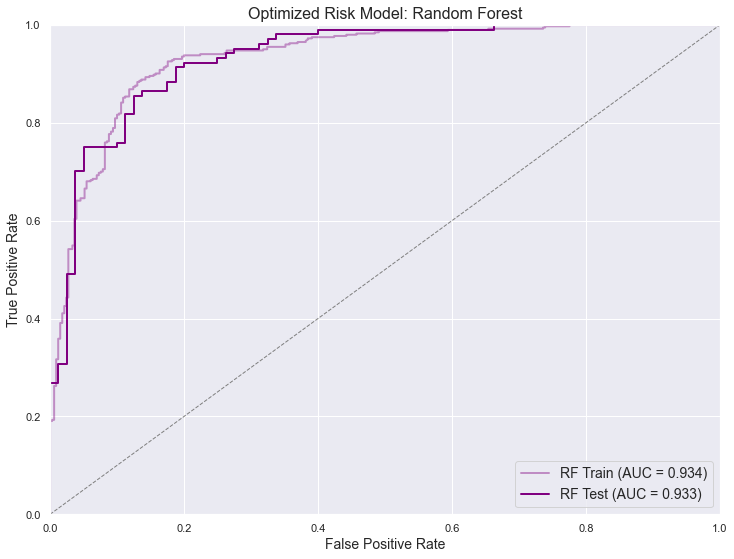

In [448]:
forest_scores_train = forest_gs.predict_proba(X_trnS)[:, 1]
forest_scores_test = forest_gs.predict_proba(X_tstS)[:, 1]

forest_fpr_train, forest_tpr_train, _ = roc_curve(y_trnS, forest_scores_train)
forest_fpr_test, forest_tpr_test, _ = roc_curve(y_tstS, forest_scores_test)

plt.figure(figsize=(12, 9))

plt.plot(forest_fpr_train, forest_tpr_train, color='purple', lw=2, alpha = 0.4, linestyle = '-',
         label=f'RF Train (AUC = {roc_auc_score(y_train, forest_scores_train):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'RF Test (AUC = {roc_auc_score(y_test, forest_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Optimized Risk Model: Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

Test AUC went from .928 (default model) to .933 using hyper=parameters optimized via a random search. Should I be concerned that the curve is not smoothe, can it be smoothed?